<a href="https://colab.research.google.com/github/7beunseo/AI-assignment/blob/main/colab/cifar/knn/CIFAR10_KNN_n_neighbors_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000, 1)
X_test.shape: (10000, 32, 32, 3)
y_test.shape: (10000, 1)
train_labels.shape (one-hot) = (50000, 10)
test_labels.shape (one-hot) = (10000, 10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Train Features Shape: (50000, 256)
Test Features Shape: (10000, 256)
k=10, 정확도=0.4048
k=11, 정확도=0.4046
k=12, 정확도=0.4103
k=13, 정확도=0.4088
k=14, 정확도=0.4074
k=15, 정확도=0.4078
k=16, 정확도=0.4088
k=17, 정확도=0.4103
k=18, 정확도=0.4077
k=19, 정확도=0.4075
k=20, 정확도=0.4085
k=21, 정확도=0.4061
k=22, 정확도=0.4065
k=23, 정확도=0.4077
k=24, 정확도=0.4067
k=25, 정확도=0.4070
k=26, 정확도=0.4081
k=27, 정확도=0.4081
k=28, 정확도=0.4085
k=29, 정확도=0.4109
k=30, 정확도=0.4107
k=31, 정확도=0.4102
k=32, 정확도=0.4092
k=33, 정확도=0.4114
k=34, 정확도=0.4105
k=35, 정확도=0.4091
k=36, 정확도=0.4058
k=37, 정확도=0.4069
k=38, 정확도=0.4089
k=39, 정확도=0.4100
k=40, 정확도=0.4083
k=41, 정확도=0.4107
k=42, 정확도=0.4084
k=43, 정확도=0.4081
k=44, 정확도=0.4087
k=45, 정확도=0.4085
k=46, 정확도=0.4099
k=47, 정확도=0.4099
k=48, 정확도=0.4100
k=49, 정확도=0.4080
최적의 k 값: 33
최적 k에서의 정확도: 0.4114


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

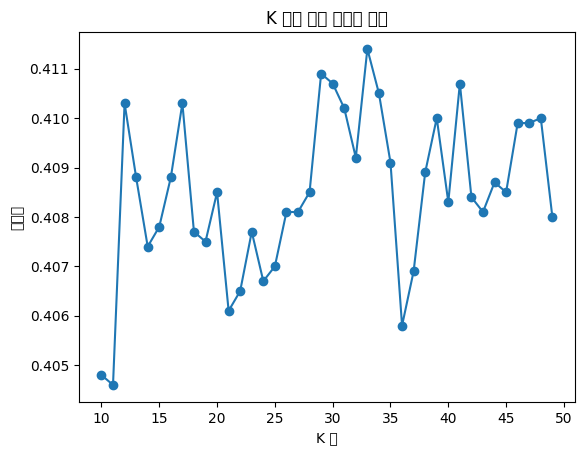

In [ ]:

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# 데이터 증강
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)


print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

# plt.figure(figsize=(10, 2))
# for i in range(5):
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(X_train[i])
#     plt.title(class_names[y_train[i][0]])  # CIFAR-10 클래스 이름 표시
#     plt.axis('off')
# plt.show()

# 레이블을 one-hot encoding으로 변환
train_labels = keras.utils.to_categorical(y_train, 10)
test_labels = keras.utils.to_categorical(y_test, 10)

print('train_labels.shape (one-hot) =', train_labels.shape)
print('test_labels.shape (one-hot) =', test_labels.shape)

train_images, test_images = X_train / 255, X_test / 255

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Dense

# CNN 모델 정의 (특성 추출기로만 사용함)
cnn_model = Sequential([
    Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Conv2D(512, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(512, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.5),

    GlobalAveragePooling2D(),
    keras.layers.Flatten()
])

# CNN 특성 추출
from sklearn.decomposition import PCA

X_train_features = cnn_model.predict(train_images)
X_test_features = cnn_model.predict(test_images)

pca = PCA(n_components=256)  # 차원을 256으로 축소
X_train_features = pca.fit_transform(X_train_features)
X_test_features = pca.transform(X_test_features)

print("Train Features Shape:", X_train_features.shape)
print("Test Features Shape:", X_test_features.shape)

# KNN 모델 학습
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

k_values = range(10, 50)  # k 값을 1부터 19까지 테스트
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_features, np.argmax(train_labels, axis=1))
    y_pred = knn.predict(X_test_features)
    accuracy = accuracy_score(np.argmax(test_labels, axis=1), y_pred)
    accuracies.append(accuracy)
    print(f"k={k}, 정확도={accuracy:.4f}")

# 가장 높은 정확도를 가진 k 값 출력
best_k = k_values[np.argmax(accuracies)]
print(f"최적의 k 값: {best_k}")
print(f"최적 k에서의 정확도: {max(accuracies):.4f}")

# 정확도 그래프 시각화
plt.plot(k_values, accuracies, marker='o')
plt.title("K 값에 따른 정확도 변화")
plt.xlabel("K 값")
plt.ylabel("정확도")
plt.show()